In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from qutip import *
plt.rcParams.update({
    "text.usetex": True})
plt.rcParams.update({'font.size': 24})


In [50]:
N = 20
a = destroy(N)
x = (a + a.dag())/np.sqrt(2)
p = 1j*(a - a.dag())/np.sqrt(2)

omega = 1
kappa = 1

H = omega*a.dag()*a
L = np.sqrt(kappa)*x
sc_ops = [L]

psi0 = coherent(N, 2)

tau = 10*np.pi*omega
t0 = 0
dt = 0.001
t = np.arange(t0, tau, dt)

In [51]:
results = ssesolve(H, psi0, t, sc_ops=sc_ops, ntraj=1, solver='euler')

Total run time:   4.24s


In [52]:
ex = np.real(np.array([expect(x, psi) for psi in results.states[0]]))
ep = np.real(np.array([expect(p, psi) for psi in results.states[0]]))

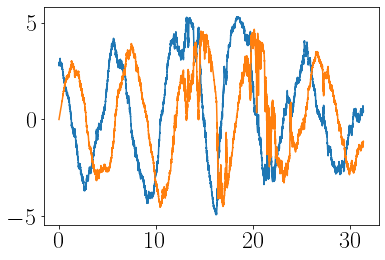

In [53]:
plt.plot(t, ex)
plt.plot(t, ep)

plt.show()